## Introduction.
<p>RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during its maiden voyage from Southampton to New York City. It is one of the most infamous shipwrecks in history. Alot of people lot their lives.</p>
<p>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
</p>
<p>We seek to analyse the data to findout which groups were likely to survive.</p>

In [50]:
# data analysis 
import numpy as np
import pandas as pd
import random as rnd
import warnings







from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# visualisation
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

<h4>Acquire Data</h4>
<p>In order to do any analysis we require data. Our titanic data is got from https://www.kaggle.com/c/titanic/data inform of CSV files.</p>
<p>We first load the data using pands read_csv() function that places them into a dataframe. It is key to note that we also combine the train and test datasets which we will use later</p>
<p>It would also be important to print the column values so as to know the features of data we are dealing with.</p>

In [51]:
dataset = pd.read_csv("train.csv")

<p>We can look at how the data looks with the first 5 entries</p>

In [52]:
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Data exploration and visualization</h3>
<p>We can analyze the features that can contribute to survival eg gender, class and age.
</p>
<h4>Survival based on class.</h4>

1st class passengers that survived: 63.0 %
2nd class passengers that survived: 47.0 %
3rd class passengers that survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


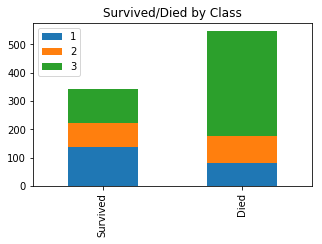

In [53]:
survived_class = dataset[dataset['Survived']==1]['Pclass'].value_counts()
dead_class = dataset[dataset['Survived']==0]['Pclass'].value_counts()
df_class = pd.DataFrame([survived_class,dead_class])
df_class.index = ['Survived','Died']
df_class.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Class")

Class1_survived= df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
Class2_survived = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
Class3_survived = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100
print("1st class passengers that survived:" ,round(Class1_survived),"%")
print("2nd class passengers that survived:" ,round(Class2_survived), "%")
print("3rd class passengers that survived:" ,round(Class3_survived), "%")

# display table
display(df_class)

<p>We can see that 1st class passengers survived more than 2nd class then 3rd. It can be said that 1st class were given preferencial treatment due to their standing in society. </p>

<h4>Survival based on gender</h4>

Percentage of female that survived: 74.0 %
Percentage of male that survived: 19.0 %


,female,male
Survived,233,109
Died,81,468


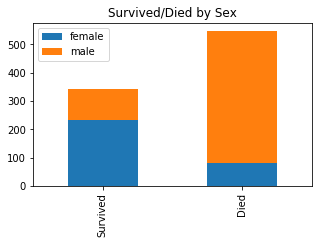

In [54]:
survived = dataset[dataset.Survived == 1]['Sex'].value_counts()
died = dataset[dataset.Survived == 0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived, died])
df_sex.index = ['Survived', 'Died']
df_sex.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by Sex")

female_survived= df_sex.female[0]/df_sex.female.sum()*100
male_survived = df_sex.male[0]/df_sex.male.sum()*100
print("Percentage of female that survived:" ,round(female_survived), "%")
print("Percentage of male that survived:" ,round(male_survived), "%")

display(df_sex) 

<p>More women than men survived. In many cultures during times of war or tragedy women and children are given priority.</p>

<h4>Survival based on Embarked</h4>

Percentage of Embark S that survived: 34.0 %
Percentage of Embark C that survived: 55.0 %
Percentage of Embark Q that survived: 39.0 %


,S,C,Q
Survived,217,93,30
Died,427,75,47


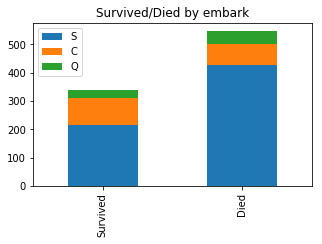

In [55]:
survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
dead_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()
df_embark = pd.DataFrame([survived_embark,dead_embark])
df_embark.index = ['Survived','Died']
df_embark.plot(kind='bar',stacked=True, figsize=(5,3), title="Survived/Died by embark")

Embark_S= df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
Embark_C = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Embark_Q = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100
print("Percentage of Embark S that survived:", round(Embark_S), "%")
print("Percentage of Embark C that survived:" ,round(Embark_C), "%")
print("Percentage of Embark Q that survived:" ,round(Embark_Q), "%")

display(df_embark)

<h3>Data cleaning, Feature selection and Feature engineering</h3>
<p>We need to prepross the training data before we can use it. If we don't the results won't be accurate.<br/> Preprocessing invovles feature selection, data cleaning and feature engineering.</p>
<p>We will first start with feature selection</p>

In [56]:
dataset.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<p>from the above features we will drop everything apart from  Survived, Pclass, Name, Sex, Age and Embarked</p>

In [57]:
X = dataset.drop(['PassengerId','Cabin','Ticket','Fare', 'Parch', 'SibSp'], axis=1)
y = X.Survived                       # vector of labels (dependent variable)
X=X.drop(['Survived'], axis=1)       # remove the dependent variable from the dataframe X

X.head(20)

,Pclass,Name,Sex,Age,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C
2,3,"Heikkinen, Miss. Laina",female,26.0,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S
4,3,"Allen, Mr. William Henry",male,35.0,S
5,3,"Moran, Mr. James",male,NaN,Q
6,1,"McCarthy, Mr. Timothy J",male,54.0,S
7,3,"Palsson, Master. Gosta Leonard",male,2.0,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,C


<p>For categorical Features such as sex and Embarked we need to encode into numerical data.</p>
<p>For sex we can use LabelEncoder from sklearn.preprocessing</p>
<p>For Embarked we can use get_dummiess= from pandas</p>

In [58]:
# encode "Sex"

labelEncoder_X = LabelEncoder()
X.Sex=labelEncoder_X.fit_transform(X.Sex)

# encode "Embarked"

# number of null values in embarked:
print ('Number of null values in Embarked:', sum(X.Embarked.isnull()))

# fill the two values with one of the options (S, C or Q)
row_index = X.Embarked.isnull()
X.loc[row_index,'Embarked']='S' 

Embarked  = pd.get_dummies(  X.Embarked , prefix='Embarked'  )
X = X.drop(['Embarked'], axis=1)
X= pd.concat([X, Embarked], axis=1)  
# we should drop one of the columns
X = X.drop(['Embarked_S'], axis=1)

X.head()

Number of null values in Embarked: 2


,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0


<p>From name we can get their titles like Mr, Mrs or Miss.</p>

In [59]:
got= dataset.Name.str.split(',').str[1]
X.iloc[:,1]=pd.DataFrame(got).Name.str.split('\s+').str[1]
X.head()

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,Mr.,1,22.0,0,0
1,1,Mrs.,0,38.0,1,0
2,3,Miss.,0,26.0,0,0
3,1,Mrs.,0,35.0,0,0
4,3,Mr.,1,35.0,0,0


<p>There are missing entries from age. </p>

In [60]:
print ('Number of null values in Age:', sum(X.Age.isnull()))

Number of null values in Age: 177


<p>177 is a high number if we remove them we will have less information to create the model.</p>
<p>We can solve the missing values by getting an average age based on the persons title. Then filling the missing gaps</p>

[['Master.',
  'Jonkheer.',
  'Lady.',
  'Sir.',
  'Don.',
  'Dr.',
  'Mme.',
  'Major.',
  'Mrs.',
  'Rev.',
  'Mr.',
  'Ms.',
  'Mlle.',
  'Capt.',
  'the',
  'Col.',
  'Miss.'],
 Name
 Capt.        70.000000
 Col.         58.000000
 Don.         40.000000
 Dr.          42.000000
 Jonkheer.    38.000000
 Lady.        48.000000
 Major.       48.500000
 Master.       4.574167
 Miss.        21.773973
 Mlle.        24.000000
 Mme.         24.000000
 Mr.          32.368090
 Mrs.         35.898148
 Ms.          28.000000
 Rev.         43.166667
 Sir.         49.000000
 the          33.000000
 Name: Age, dtype: float64]

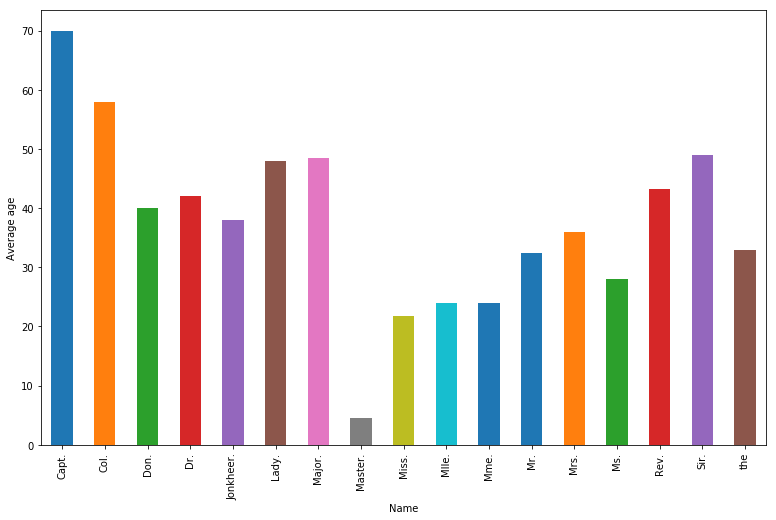

In [61]:
ax = plt.subplot()
ax.set_ylabel('Average age')
X.groupby('Name').mean()['Age'].plot(kind='bar',figsize=(13,8), ax = ax)

title_mean_age=[]
title_mean_age.append(list(set(X.Name)))  #set for unique values of the title, and transform into list
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age

In [62]:
n_traning= dataset.shape[0]   #number of rows
n_titles= len(title_mean_age[1])
for i in range(0, n_traning):
    if np.isnan(X.Age[i])==True:
        for j in range(0, n_titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]
                
                
X=X.drop(['Name'], axis=1)

<p>It is also possible to do feature transformation. Transform age into adults and children.</p>

In [63]:
for i in range(0, n_traning):
    if X.Age[i] > 18:
        X.Age[i]= 0
    else:
        X.Age[i]= 1

X.head()

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,0
1,1,0,0.0,1,0
2,3,0,0.0,0,0
3,1,0,0.0,0,0
4,3,1,0.0,0,0


In [64]:
#X=X.drop(['Pclass'], axis=1)
#X.head()

<h3>Testing Different classifiers.</h3>
<p>From our processed data it is possible to run different classifiers and get their accuracies</p>

In [65]:
#-----------------------Logistic Regression---------------------------------------------
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l2',random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Logistic Regression:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#-----------------------------------K-NN --------------------------------------------------

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)


# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("K-NN:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------------SVM -------------------------------------------------

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("SVM:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")


#---------------------------------Naive Bayes-------------------------------------------

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Naive Bayes:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std(),"\n")



#----------------------------Random Forest------------------------------------------

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=X , y=y , cv = 10)
print("Random Forest:\n Accuracy:", accuracies.mean(), "+/-", accuracies.std())


Logistic Regression:
 Accuracy: 0.7811678583588695 +/- 0.02594150466779637 

K-NN:
 Accuracy: 0.8103200544773579 +/- 0.031150858002374392 

SVM:
 Accuracy: 0.7855873340143003 +/- 0.026622568318719446 

Naive Bayes:
 Accuracy: 0.7767744864374079 +/- 0.02617976826959799 

Random Forest:
 Accuracy: 0.8137033253887186 +/- 0.031741002619065845


<p>From the 5 classifiers used we can see that Random Forest has the better result of the 5.</p>